In [12]:
import librosa
import seaborn as sns
import numpy as np
import tensorflow as tf
import os
import IPython
import noisereduce as nr
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from tensorflow import keras

In [3]:
dataset_path = r'C:\Users\leeju\BirdProject\dataset_updated'

In [4]:
# function to return bird name from first index with dot seperation
def extract_bird_class(bird_name):
    return bird_name.split('.')[0]

In [5]:
# Visualise bird classes with bar graph
def plot_bird_class_counts(bird_class_counts):
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 8))
    ax=sns.barplot(x=list(bird_class_counts.keys()), y=list(bird_class_counts.values()))
    plt.title('Number of Bird Classes in Dataset')
    plt.xticks(rotation=75)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=12)
    plt.xlabel('Bird Class')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [6]:
# Function for calculating statistical summary
def calculate_statistics(class_counts):
    count_values=list(class_counts.values())
    sum_count=sum(count_values)
    mean_count=sum(count_values)/len(count_values)
    max_count=max(count_values)
    min_count=min(count_values)
    return sum_count, mean_count, max_count, min_count

In [7]:
# list of folder to loop into all subfolders for wav files
folders = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10',
           'fold11', 'fold12', 'fold13', 'fold14', 'fold15', 'fold16', 'fold17', 'fold18', 'fold19',
           'fold20', 'fold21', 'fold22', 'fold23', 'fold24', 'fold25', 'fold26', 'fold27', 'fold28', 
           'fold29', 'fold30', 'fold31', 'fold32', 'fold33', 'fold34', 'fold35', 'fold36', 'fold37',
           'fold38', 'fold39', 'fold40', 'fold41', 'fold42', 'fold43', 'fold44']

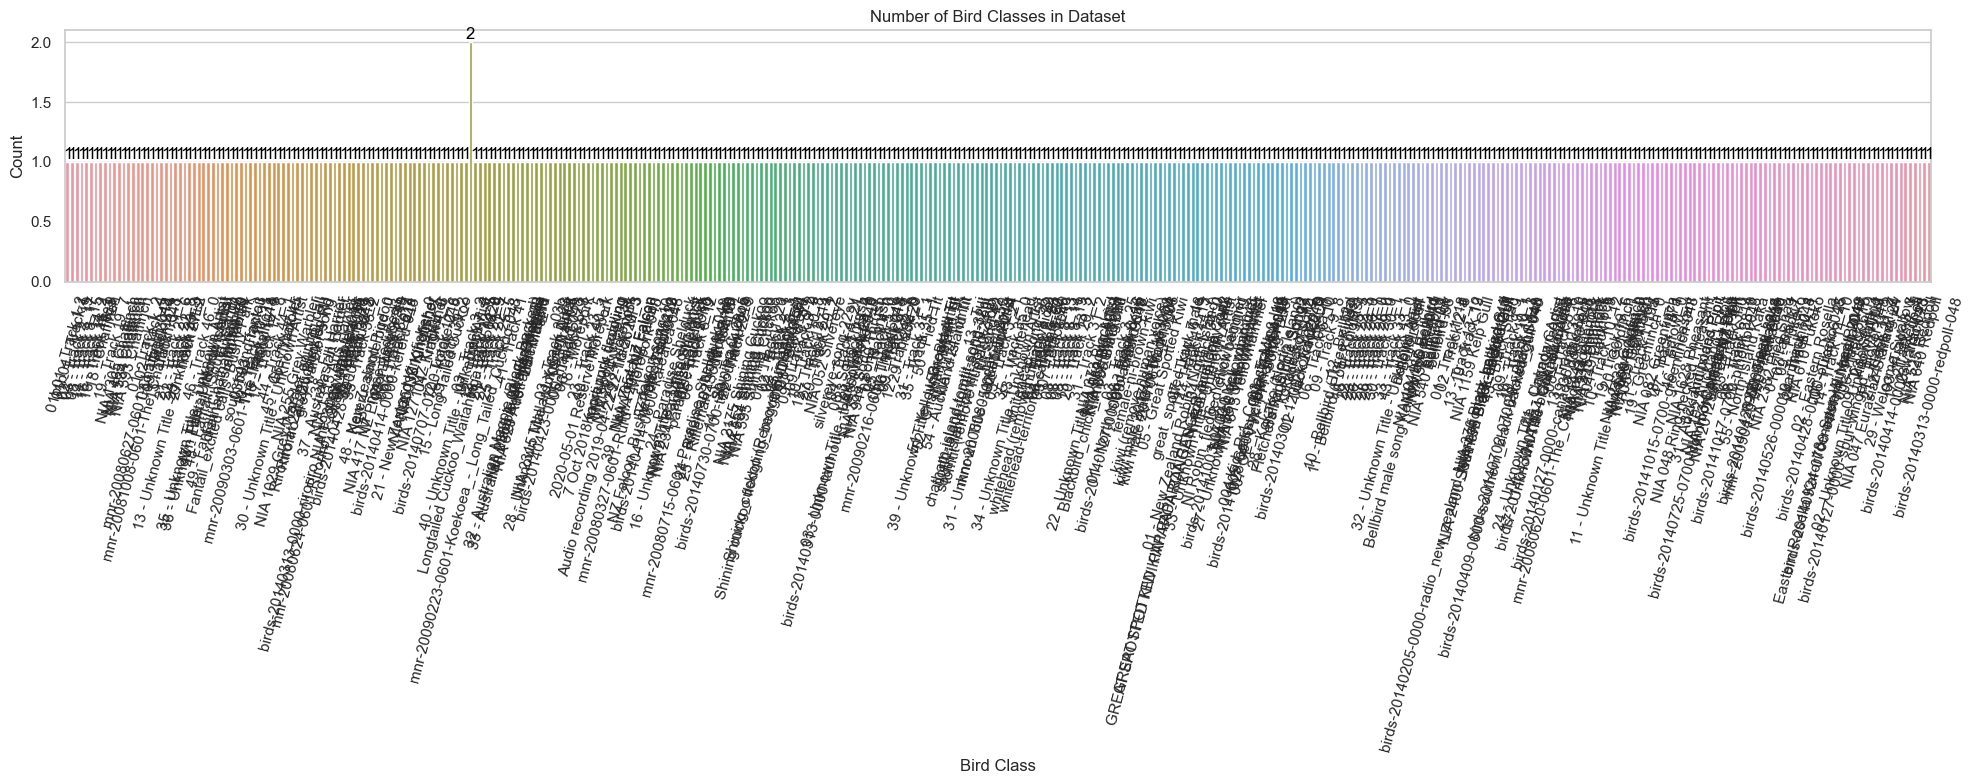

In [11]:
# counter for each bird subfolder #Change file names
bird_class_counts = Counter()

# Iterate through each bird class and name
for folds in folders:
    folder_path=f'{dataset_path}/{folds}'
    wav_files=librosa.util.find_files(folder_path) #, ext='wav')
    bird_classes=[extract_bird_class(os.path.basename(file)) for file in wav_files]
    bird_class_counts.update(bird_classes)

plot_bird_class_counts(bird_class_counts)

In [10]:
# Statistical summary
sum_count, mean_count, max_count, min_count = calculate_statistics(bird_class_counts)

print(f"[Total]: {sum_count}")
print(f"[Mean]: {mean_count:.2f}")
print(f"[Max]: {max_count}")
print(f"[Min]: {min_count}")

NameError: name 'bird_class_counts' is not defined

In [ ]:
# Loop through each folder to check audio quality

# Set path directory
folds = os.listdir(dataset_path)

# Loop through each fold
for fold in tqdm(folds, desc='Progression'):
    folder_path = os.path.join(dataset_path, fold)
    wav_files = librosa.util.find_files(folder_path, ext='wav')
    
    # Loop through each wav file in the folder
    for wav_file in wav_files:
        audio, sr = librosa.load(wav_file, sr=None)
        print(f"Sample rate for {wav_file}: {sr} Hz")

In [ ]:
# Audio path of a sample not noise reduced
#sample = r'C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.01.wav'
sample = r'C:\Users\leeju\BirdProject\data_for_code_new\fold1\Australasianbittern.01.wav'

In [ ]:
# Sample without noise reduced
ipd.Audio(sample)

In [ ]:
# Validate sample rate of 22050
print(sr)

In [ ]:
# Check number of audio samples in audio signal
audio.shape

In [ ]:
# Double check audio's length in seconds
66150/sr

In [ ]:
# Declare audio path of 2 samples
#austra_sample = r'C:\Users\ssr2801\Bird\data_for_code_new\fold1\Australasianbittern.01.wav'
austra_sample = r'C:\Users\leeju\BirdProject\data_for_code_new\fold1\Australasianbittern.01.wav'

In [ ]:
# Load audio signals using librosa
austrabittern1, sr = librosa.load(austra_sample, sr=sr)

In [ ]:
# Apply stationary noise reduction (calculates each frequency channel for noise gate). We use stationary here because we cannot predict when unwanted audio will be present 
reduced_noise = nr.reduce_noise(y=austrabittern1, sr=sr, n_fft=2048, hop_length=512, thresh_n_mult_nonstationary=5, stationary=False)

In [ ]:
# Hear sample audio and plot mel-spectrogram

sample = librosa.feature.melspectrogram(y=reduced_noise, 
                                       sr=sr, 
                                       n_fft=2048, 
                                       hop_length=512, 
                                       n_mels=128)
# mel_spectrogram is taken in by M_db
M_db = librosa.power_to_db(sample, ref=np.max)
plt.figure(figsize=(12,6)) # Image display only
image = librosa.display.specshow(M_db,        
                                 x_axis='time',
                                 y_axis='mel', 
                                 sr=sr)
plt.title("Austra_04_sample")
plt.colorbar(image, format="%2.f dB")
ipd.Audio(data=reduced_noise, rate=sr)

In [ ]:
folder_path = os.path.join(dataset_path, fold)

In [ ]:
# labelencoder to map class for labeling and numeric values
name_to_num = LabelEncoder()

In [ ]:
# function to extract mel-spectrogram for cv. store Mel-Spectrogram to a list along with label
def generate_mel_spectrograms(folds):
    mel_spectrograms = []
    labels = []
    
    for fold in tqdm(folds, desc='Progression'):

        for wav_file in tqdm(wav_files, desc=f"Processing {fold}"):
            bird, sr = librosa.load(wav_file, sr=22050)
            mel_spectrogram = librosa.feature.melspectrogram(y=bird, 
                                                             sr=22050,
                                                             n_fft=2048, 
                                                             hop_length=512, 
                                                             n_mels=128)
            M_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
            mel_spectrograms.append(M_db)
            labels.append(extract_bird_class(os.path.basename(wav_file)))
            
            # String to numerical labels using LabelEncoder
            encoded_labels = [name_to_num.fit_transform(lbls) for lbls in labels]

    return mel_spectrograms, encoded_labels

In [ ]:
def get_mfcc(wav_file_path):
    y, sr = librosa.load(wav_file_path, offset=0, duration=30)
    mfcc = numpy.array(librosa.feature.mfcc(y=y, sr=sr))
    return mfcc

In [ ]:
example_file = "dataset/classical/classical.00015.wav"
mfcc = get_mfcc(example_file)
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_mel_feature(#file_path):
    mel_spectrogram = numpy.concatenate()

In [ ]:
def get_mfcc_feature(#file_path):
    mfcc_feature = numpy.concatenate()

In [ ]:
#From website
directory = 'dataset'
genres = ['reggae','classical','rock']
features = []
labels = []
for genre in genres:
    print("Calculating features for genre : " + genre)
    for file in os.listdir(directory+"/"+genre):
        file_path = directory+"/"+genre+"/"+file

        features.append(get_feature(file_path))
        label = genres.index(genre)
        labels.append(label)